<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load the dataset
ds = pd.read_csv("/content/drive/MyDrive/Data_Science/PGP-AIML/Projects/Project4b- Bank Churn Prediction/Churn.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [5]:
# The first 5 rows of the dataset
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# The last 5 rows of the dataset
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# The shape of the dataset
ds.shape

(10000, 14)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# check missing values in the dataset
ds.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
# check uniquue values for each column
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [12]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Observations and Conclusion:

**Observations:**
- Dataset consists of 10,000 rows with 14 columns including demographic, transactional, and target (Exited) features.
- Variables like Geography, Gender, Age, Balance, and IsActiveMember may be influential.

**Conclusion:**
- Initial inspection confirms sufficient feature variety and balance for a meaningful classification task.

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# The function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# The function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

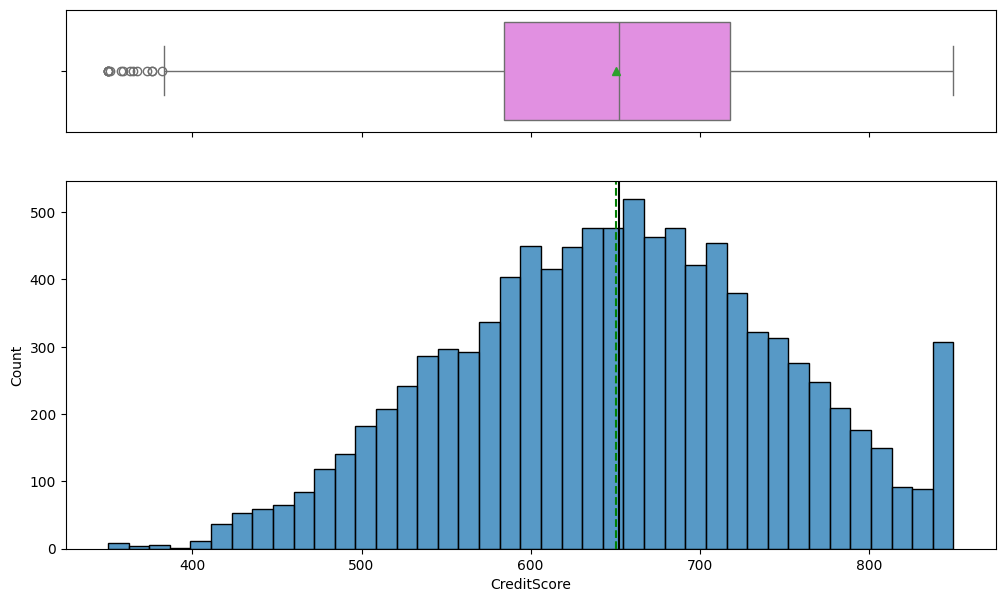

In [15]:
# Visualizing the distribution of 'CreditScore' using a histogram and boxplot to detect outliers and skewness.
histogram_boxplot(ds,'CreditScore')

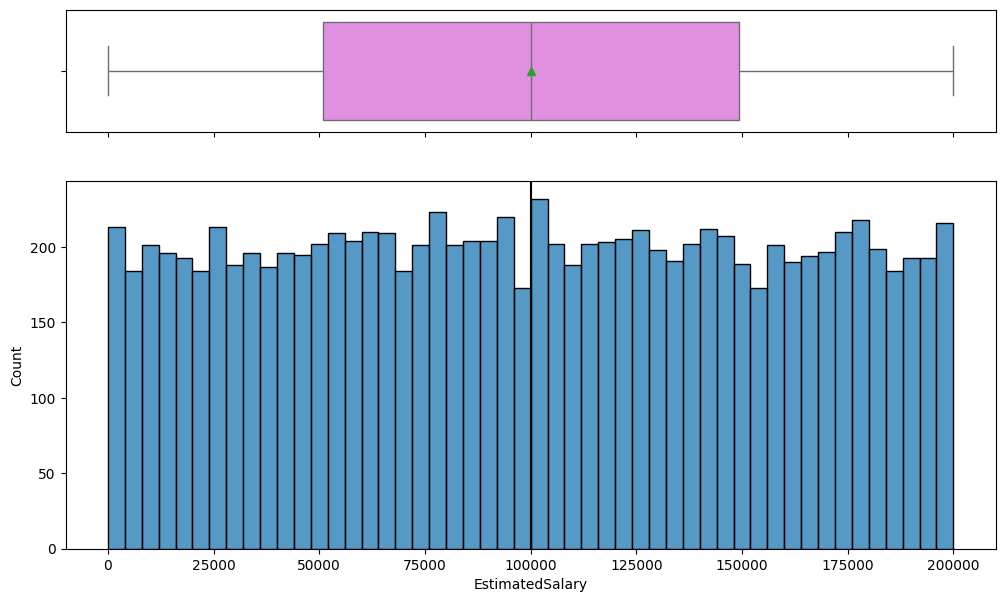

In [16]:
# Visualizing the distribution of 'EstimatedSalary' using a histogram and boxplot to detect outliers and skewness.
histogram_boxplot(ds,'EstimatedSalary', bins=50)

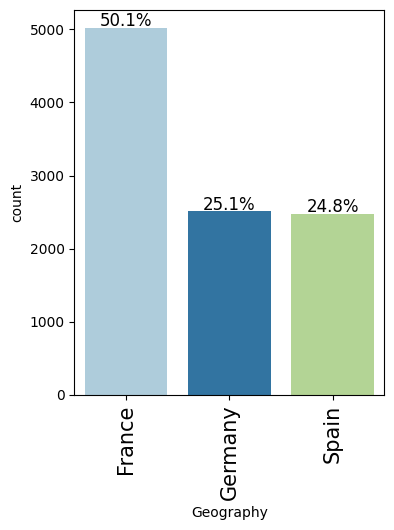

In [17]:
# Plotting the percentage distribution of the target variable 'Geography' to understand class imbalance.
labeled_barplot(ds, "Geography", perc=True)

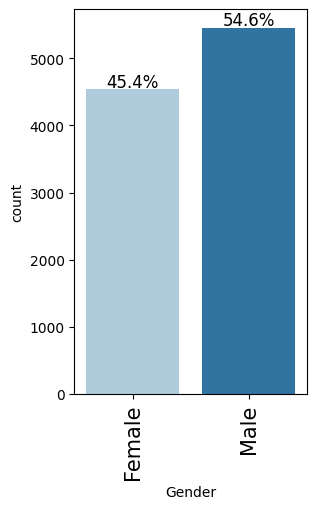

In [18]:
# Plotting the percentage distribution of the target variable 'Gender' to understand class imbalance.
labeled_barplot(ds, "Gender", perc=True)

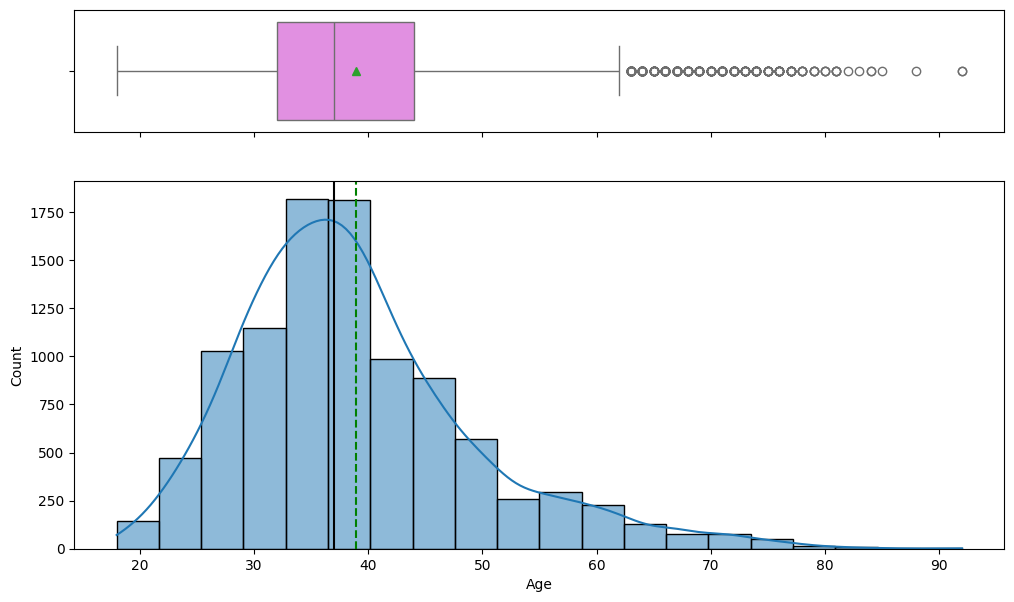

In [19]:
# Visualizing the distribution of 'Age' using a histogram and boxplot to detect outliers and skewness.
histogram_boxplot(ds, "Age", kde=True, bins=20)

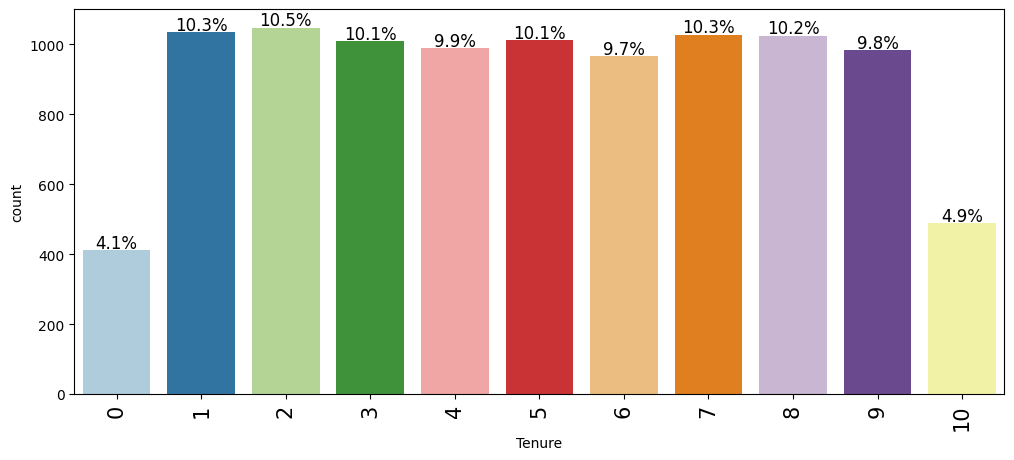

In [20]:
# Plotting the percentage distribution of the target variable 'Tenure' to understand class imbalance.
labeled_barplot(ds, "Tenure", perc=True)

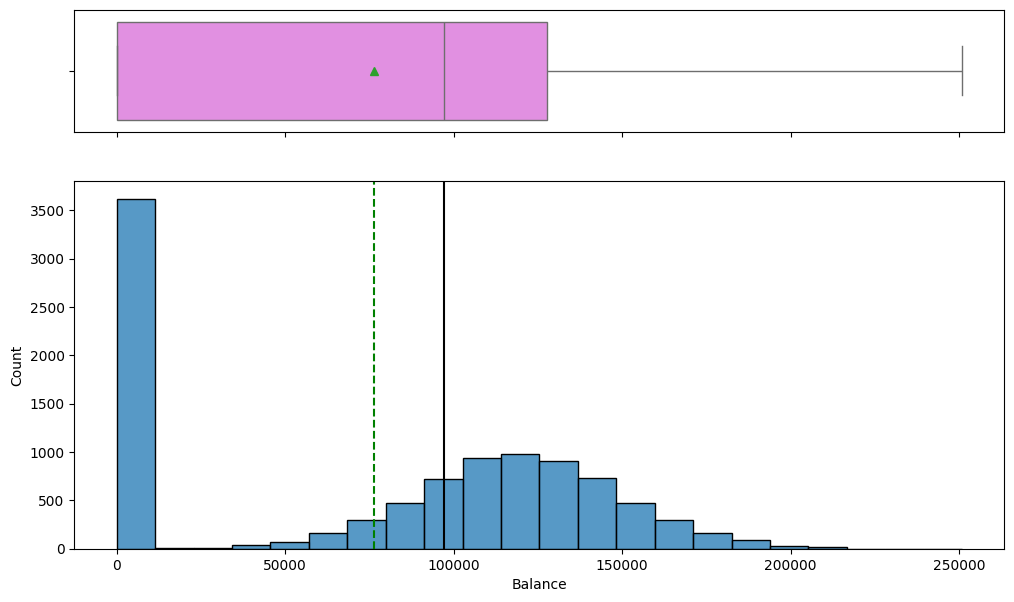

In [21]:
# Visualizing the distribution of 'Balance' using a histogram and boxplot to detect outliers and skewness.
histogram_boxplot(ds, "Balance")

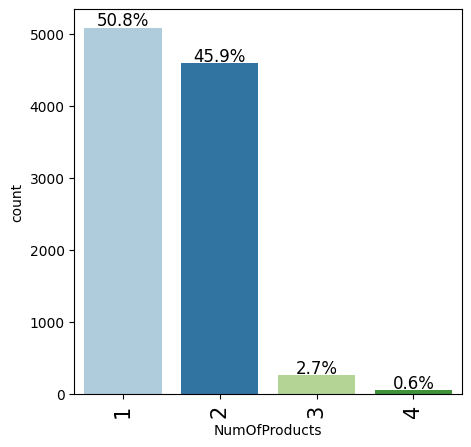

In [22]:
# Plotting the percentage distribution of the target variable 'NumOfProducts' to understand class imbalance.
labeled_barplot(ds, "NumOfProducts", perc=True)

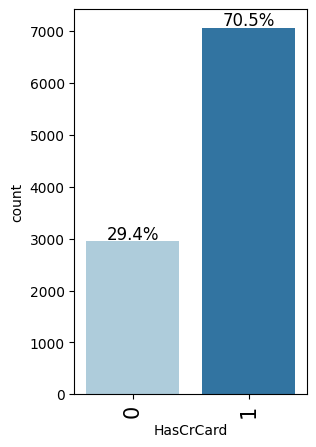

In [23]:
# Plotting the percentage distribution of the target variable 'HasCrCard' to understand class imbalance.
labeled_barplot(ds, "HasCrCard", perc=True)

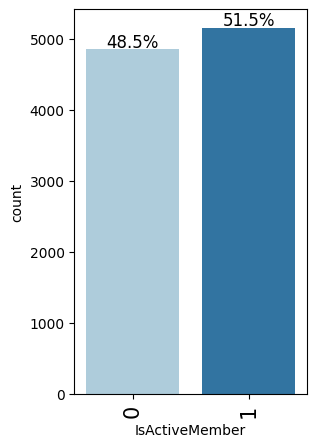

In [24]:
# Plotting the percentage distribution of the target variable 'IsActiveMember' to understand class imbalance.
labeled_barplot(ds, "IsActiveMember", perc=True)

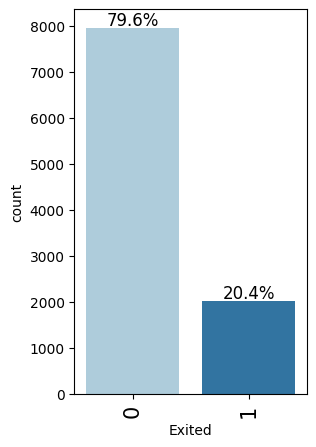

In [25]:
# Plotting the percentage distribution of the target variable 'Exited' to understand class imbalance.
labeled_barplot(ds, "Exited", perc=True)

#### Observations and Conclusion:

**Observations:**
- Age and balance show wide variability.
- Categorical variables like Geography and Gender show imbalance.

**Conclusion:**
- Feature scaling and encoding are needed before training.

### Bivariate Analysis

In [26]:
# The function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

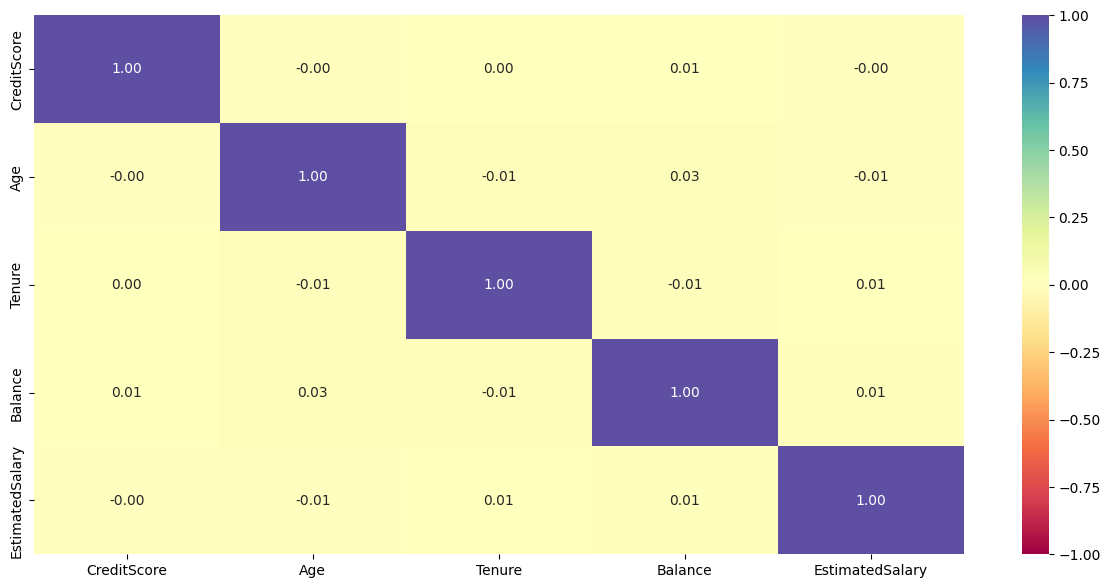

In [28]:
# Plotting the correlation heatmap to understand linear relationships between numerical features in the dataset.
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


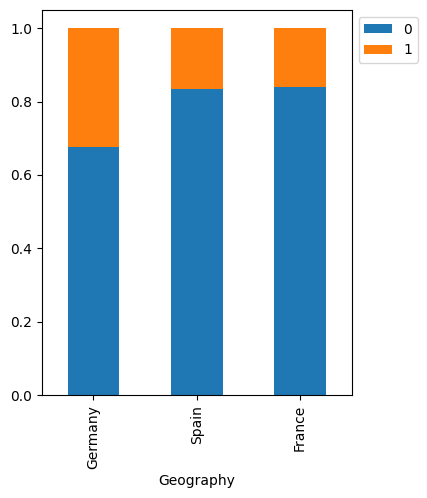

In [29]:
# Creating a stacked bar plot to compare the distribution of Exited vs Retained customers across different geographic regions.
stacked_barplot(ds, "Geography", "Exited" )

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


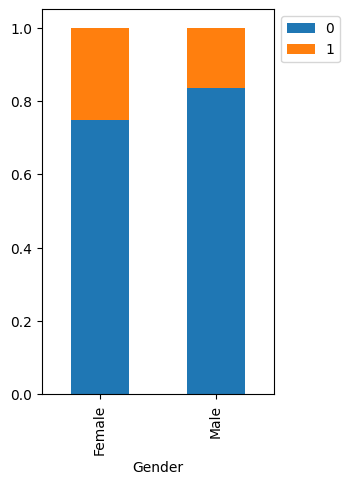

In [30]:
# Plotting churn distribution across gender to examine if gender plays a role in customer exit.
stacked_barplot(ds, "Gender", "Exited" )

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


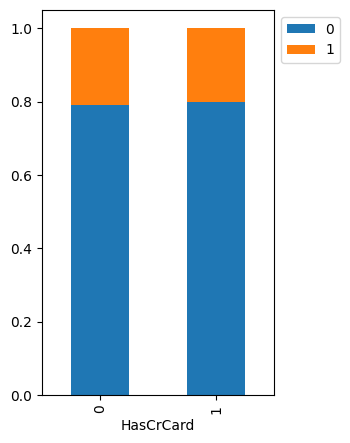

In [31]:
# Visualizing the relationship between credit card ownership and churn behavior using a stacked bar plot.
stacked_barplot(ds, "HasCrCard", "Exited" )

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


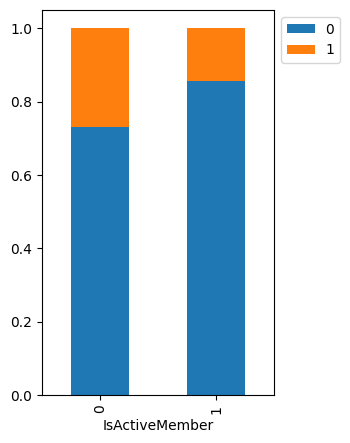

In [32]:
# Analyzing the impact of account activity status on churn using a stacked bar plot.
stacked_barplot(ds, "IsActiveMember", "Exited" )

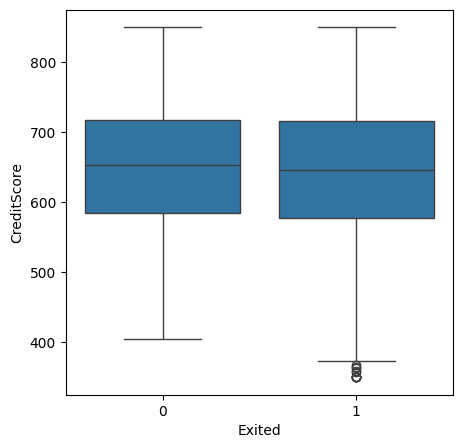

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

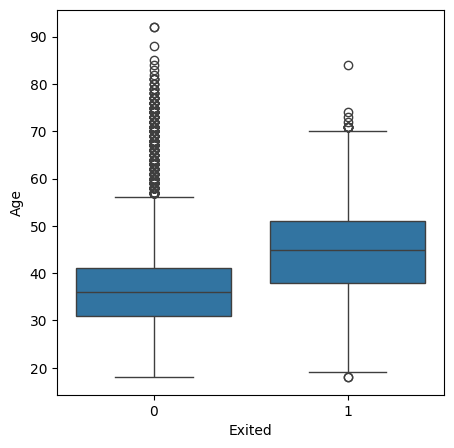

In [34]:
# Boxplot to explore how customer age relates to churn behavior.
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

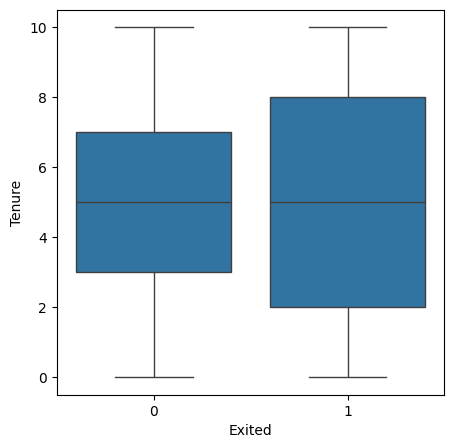

In [35]:
# Boxplot to analyze the relationship between tenure (years with the bank) and customer churn.
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

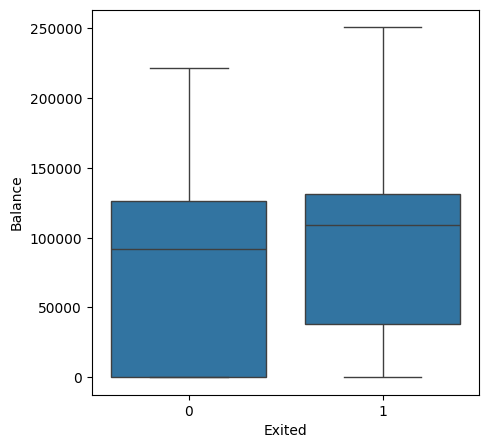

In [36]:
# Boxplot comparing customer balance distributions between exited and retained customers.
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

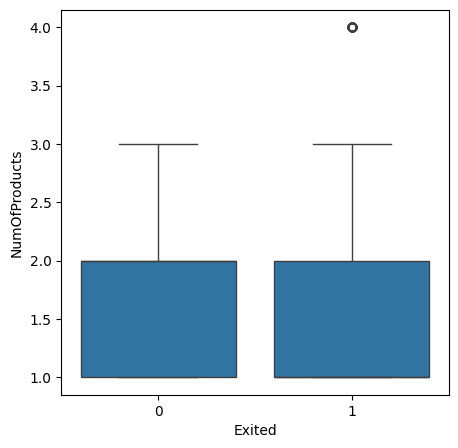

In [37]:
# Boxplot to study how the number of products held by a customer correlates with churn behavior.
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

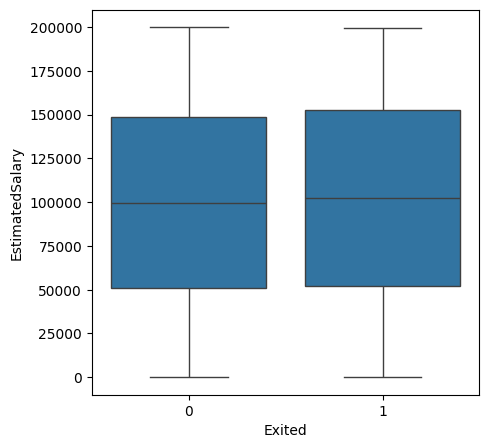

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

#### Observations and Conclusion:

**Observations:**
- Inactive members have a much higher churn rate than active ones, highlighting a strong correlation between low engagement and customer exit. This suggests that boosting customer activity levels could significantly reduce churn.
- The median credit scores of churned and retained customers are very similar, with slightly more variability among those who stayed. This implies Credit Score alone may not be a strong indicator of churn.
- Customers who exited tend to be older on average, and show less variability in age. Age appears to be a significant factor, possibly linked to changes in financial needs or product suitability as customers age.
- Female customers exhibit a slightly higher churn rate than male customers. While the difference isn't very large, it might be worth exploring gender-based engagement or marketing strategies to retain more female customers.
- Tenure does not show a strong relationship with churn. Both exited and retained customers are distributed fairly evenly across tenure values. This suggests tenure alone is not a major predictor of churn in this dataset.
- Exited customers tend to have higher average balances than those who stayed. This is concerning, as losing high-balance customers may significantly impact bank revenue, indicating a priority segment for retention strategies.
- Most churners have either 1 or 2 products, with a sharp decline beyond that. Interestingly, churn is higher among customers with only 1 product, suggesting cross-selling more products could reduce churn.
- Salary distribution is very similar across both churned and retained customers. Thus, estimated salary does not appear to influence churn, and likely isn't a meaningful predictor on its own.

- Higher churn among customers from Germany.
- Inactive members and customers with fewer products are more likely to churn.

**Conclusion:**
- These patterns justify prioritizing these features in modeling.

## Data Preprocessing

### Dummy Variable Creation

In [39]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

### Train-validation-test Split

In [40]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [41]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y, shuffle = True)

In [42]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [43]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [44]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

In [45]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

### Observations and Conclusion:

**Observations:**
- One-hot encoding applied correctly for categorical features.
- Normalization ensures neural network performs optimally.
- Stratified train-validation-test split preserves churn distribution.

**Conclusion:**
- Clean pipeline built for fair model training and evaluation.

## Model Building

### Model Evaluation Criterion

1. In the context of churn prediction, the model may make two types of incorrect predictions:

False Positive (FP): Predicting that a customer will exit when they actually won’t.

False Negative (FN): Predicting that a customer will stay when they are actually going to exit.


2. Which is more critical?

The False Negative scenario is more costly for the bank. If the model fails to identify a customer who is likely to leave, the bank loses the opportunity to intervene and retain them. This could directly impact revenue and customer lifetime value.


3. Goal: Minimize False Negatives

To reduce this risk, the focus should be on maximizing Recall. A higher recall means the model correctly identifies more of the actual churners (true positives), thereby reducing false negatives.

  -> Recall = True Positives / (True Positives + False Negatives)

By prioritizing recall, the bank can proactively reach out to at-risk customers and improve retention strategies.


In [46]:
labels = ["Retained", "Churned"]  # Instead of 0, 1


In [47]:
# The function to generate confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, labels=["Retained", "Churned"]):
    # Create the confusion matrix using integer labels (0, 1)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Define quadrant labels
    quadrant_labels = np.array([["TN", "FP"],
                                ["FN", "TP"]])

    # Prepare annotations
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = cm_percent[i, j] * 100
            label = quadrant_labels[i, j]
            annot[i, j] = f"{count} ({percent:.1f}%)\n{label}"

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                cbar=True, linewidths=0.5, linecolor='gray',
                annot_kws={"size": 12})

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, rotation=0)
    plt.xlabel('Predicted Label', fontsize=13)
    plt.ylabel('True Label', fontsize=13)
    plt.title('Confusion Matrix with Counts, Percentages, and Labels', fontsize=14)
    plt.tight_layout()
    plt.show()


In [48]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

#### Observations and Conclusion:

**Observations:**
- Churn is a business-critical event; false negatives (missed churners) are more dangerous than false positives.
- Thus, recall is prioritized over accuracy.

**Conclusion:**
- Model should aim to maximize recall to catch as many true churners as possible.

### Neural Network with SGD Optimizer

In [49]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [50]:
# Initializing the neural network
model_0 = Sequential()

# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding a hidden layer with 32 neurons and relu activation
model_0.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron (binary classification) and sigmoid activation
model_0.add(Dense(1, activation='sigmoid'))


In [51]:
# Using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

metric = keras.metrics.Recall()

In [52]:
## The model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [53]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,         # Common choice for batch size
    validation_data=(X_val, y_val),
    epochs=50,             # Good starting point for training epochs
    verbose=1
)


Epoch 1/50
200/200 [==============================] - 3s 11ms/step - loss: 0.6131 - recall: 0.0729 - val_loss: 0.5794 - val_recall: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.5594 - recall: 0.0023 - val_loss: 0.5425 - val_recall: 0.0000e+00
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5310 - recall: 0.0000e+00 - val_loss: 0.5224 - val_recall: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.5150 - recall: 0.0000e+00 - val_loss: 0.5106 - val_recall: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5052 - recall: 0.0000e+00 - val_loss: 0.5029 - val_recall: 0.0000e+00
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4984 - recall: 0.0000e+00 - val_loss: 0.4974 - val_recall: 0.0000e+00
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4933 - recall: 0.0000e+00 - val_loss: 0.4931 - val_reca

**Loss function**

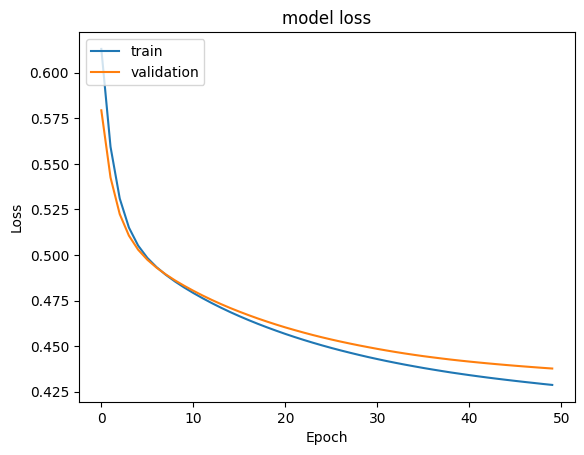

In [55]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

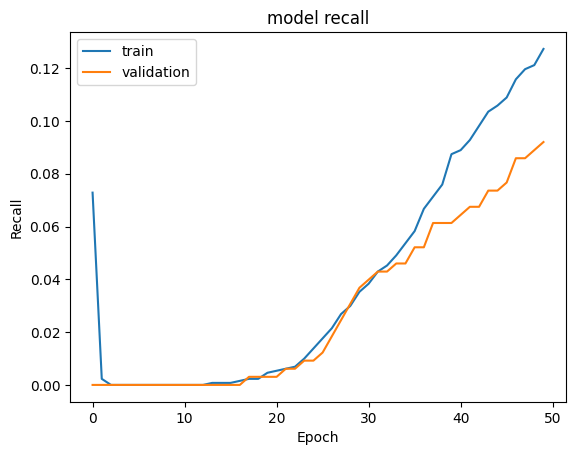

In [56]:
# Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
# Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [58]:
# Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [59]:
model_name = "NN with SGD"

# Store training recall
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
print("Train Recall:", recall_score(y_train, y_train_pred))

# Store validation recall
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.12883435582822086
Validation Recall: 0.09202453987730061


**Classification report**

In [60]:
from sklearn.metrics import classification_report

# Classification report on train set
cr = classification_report(y_train, y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      5096
           1       0.65      0.13      0.21      1304

    accuracy                           0.81      6400
   macro avg       0.73      0.56      0.55      6400
weighted avg       0.78      0.81      0.75      6400

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1274
           1       0.59      0.09      0.16       326

    accuracy                           0.80      1600
   macro avg       0.70      0.54      0.52      1600
weighted avg       0.76      0.80      0.74      1600



**Confusion matrix**

Confusion Matrix - Training Set


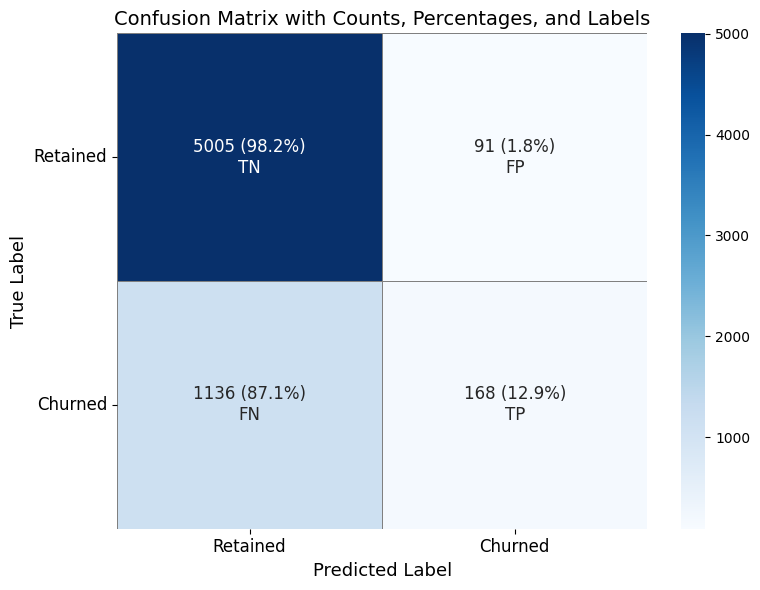

In [61]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train, y_train_pred)

Confusion Matrix - Validation Set


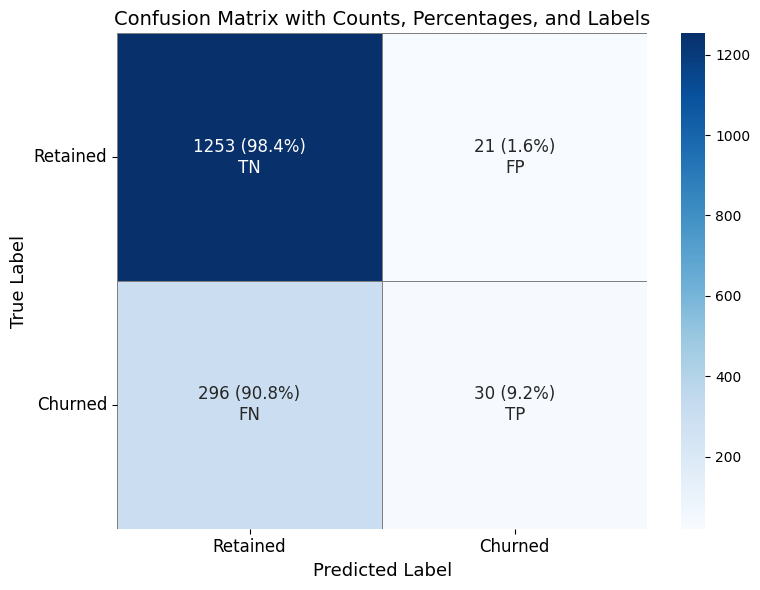

In [62]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation:
- Very low recall (~0.09 on validation). Model underfits.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [63]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.Recall()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

model_1.summary()

#Fitting the ANN
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4512 - recall: 0.1020 - val_loss: 0.4334 - val_recall: 0.1442
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4101 - recall: 0.2684 - val_loss: 0.4177 - val_recall: 0.2669
Epoch 3/50

**Loss function**

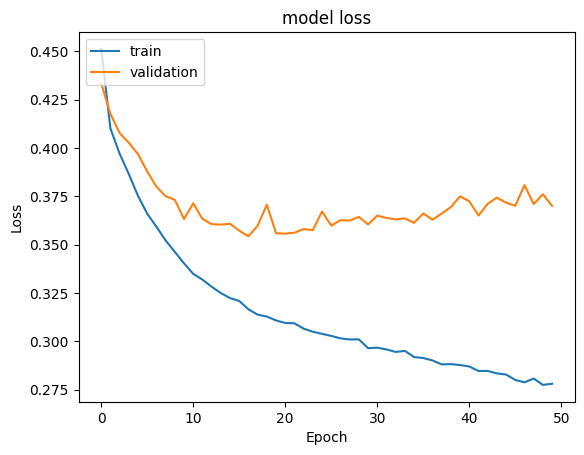

In [64]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

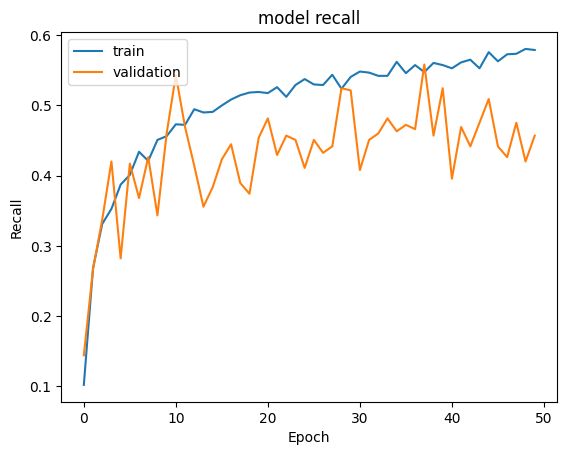

In [65]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [66]:
# Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [67]:
# Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [68]:
model_name = "NN with Adam"

# Compute snd Store the recall scores
train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
print("Train Recall:", recall_score(y_train, y_train_pred))

valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.5973926380368099
Validation Recall: 0.4570552147239264


**Classification report**

In [69]:
# Classification report on train set
cr=classification_report(y_train,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      5096
           1       0.82      0.60      0.69      1304

    accuracy                           0.89      6400
   macro avg       0.86      0.78      0.81      6400
weighted avg       0.89      0.89      0.88      6400

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1274
           1       0.70      0.46      0.55       326

    accuracy                           0.85      1600
   macro avg       0.78      0.70      0.73      1600
weighted avg       0.84      0.85      0.84      1600



**Confusion matrix**

Confusion Matrix - Training Set


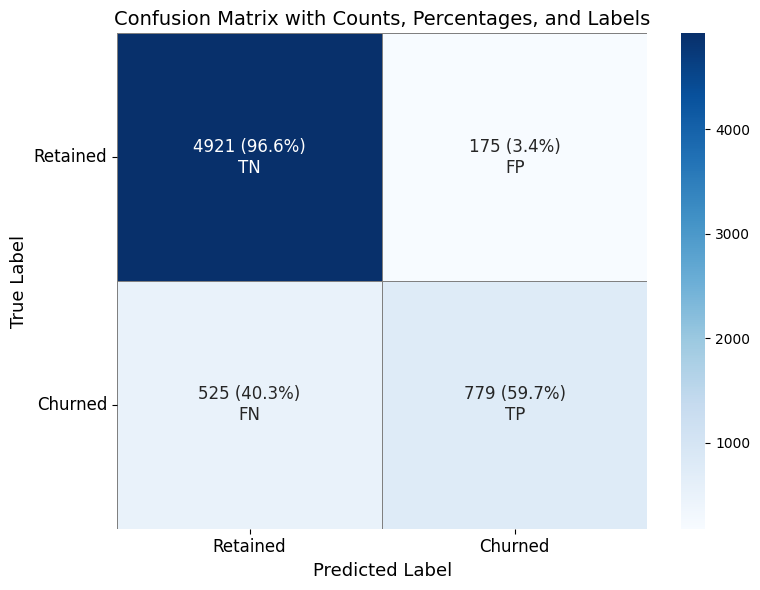

In [70]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train, y_train_pred)

Confusion Matrix - Validation Set


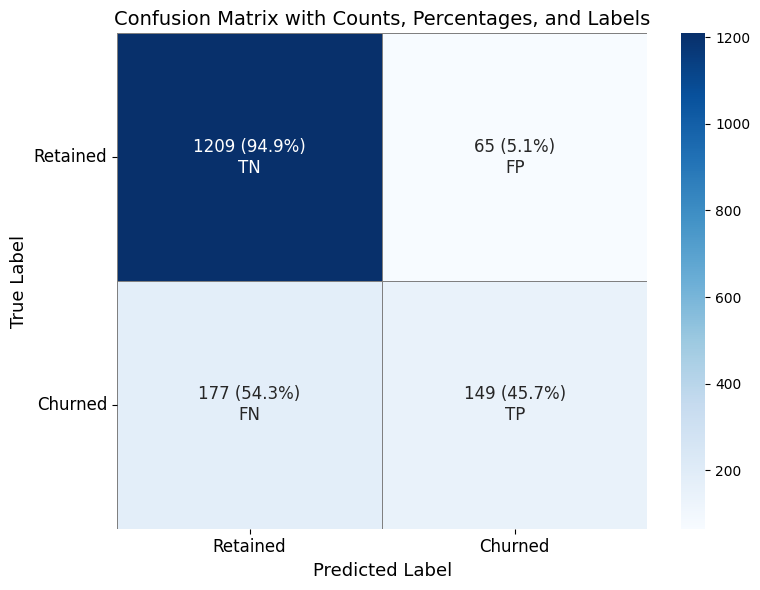

In [71]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation:
- Significant improvement in recall (~0.39). Better optimizer.

### Neural Network with Adam Optimizer and Dropout

In [72]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.3)) # Drop 30% neurons in first layer
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dropout(0.2)) # Drop 20% neurons in second layer
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.Recall()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

model_2.summary()

history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

**Loss function**

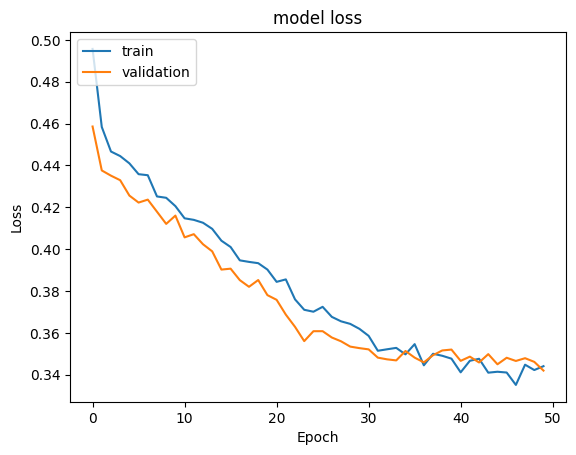

In [73]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

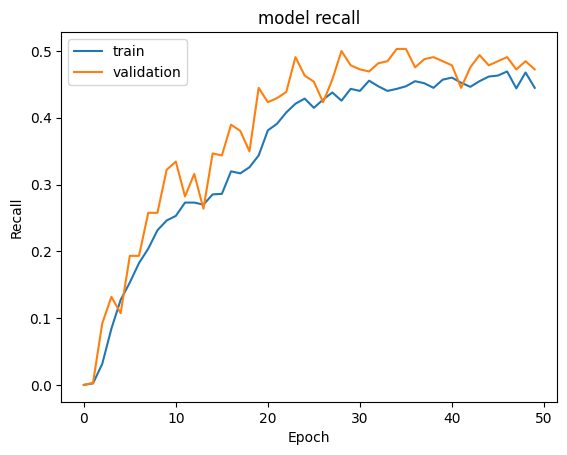

In [74]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [75]:
# Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [76]:
# Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [77]:
model_name = "NN with Adam & Dropout"

# Compute, Store and validate recall scores
train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
print("Train Recall:", recall_score(y_train, y_train_pred))

valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.5061349693251533
Validation Recall: 0.4723926380368098


**Classification report**

In [78]:
# Classification report on train set
cr=classification_report(y_train,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.79      0.51      0.62      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.74      0.77      6400
weighted avg       0.87      0.87      0.86      6400

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1274
           1       0.76      0.47      0.58       326

    accuracy                           0.86      1600
   macro avg       0.82      0.72      0.75      1600
weighted avg       0.85      0.86      0.85      1600



**Confusion matrix**

Confusion Matrix - Training Set


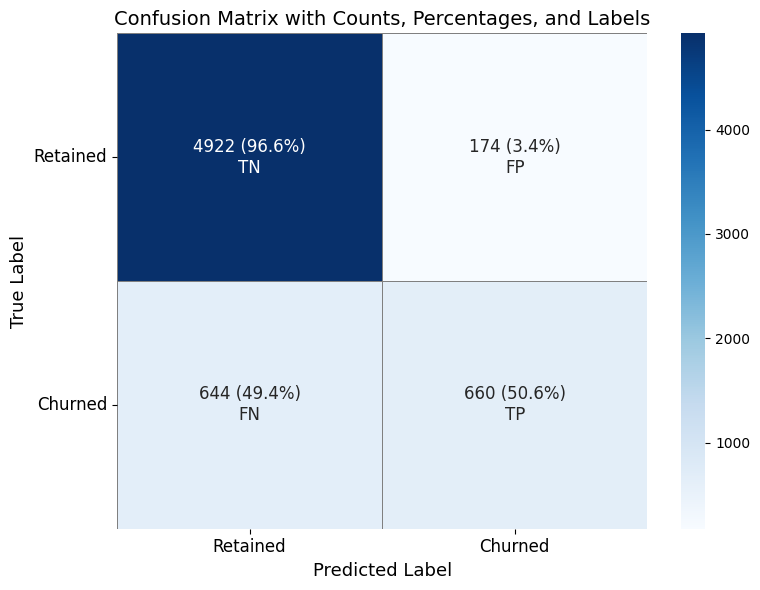

In [79]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train, y_train_pred)

Confusion Matrix - Validation Set


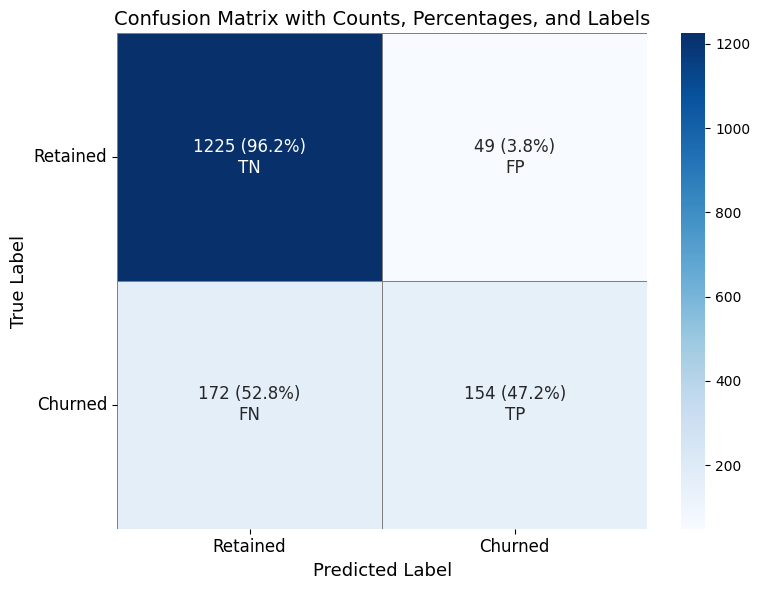

In [80]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation:
- Slight drop in train recall, but improved generalization. Dropout helps reduce overfitting.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [81]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [82]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metric = tf.keras.metrics.Recall()
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

model_3.summary()

history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1953 (7.63 KB)
Trainable params: 1953 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
319/319 [==============================] - 1s 3ms/step - loss: 0.6916 - recall: 0.9276 - val_loss: 0.7140 - val_recall: 0.9141
Epoch 2/50
319/319

**Loss function**

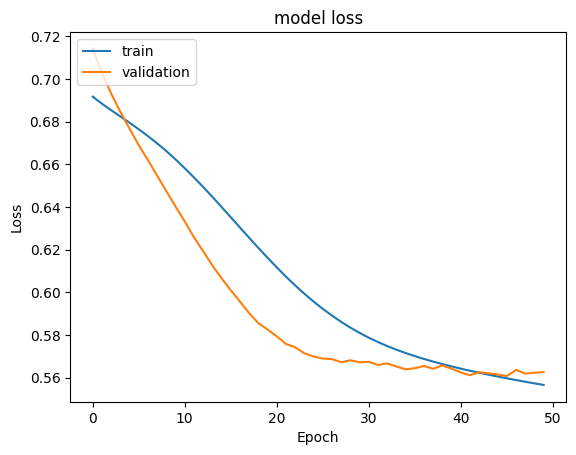

In [83]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

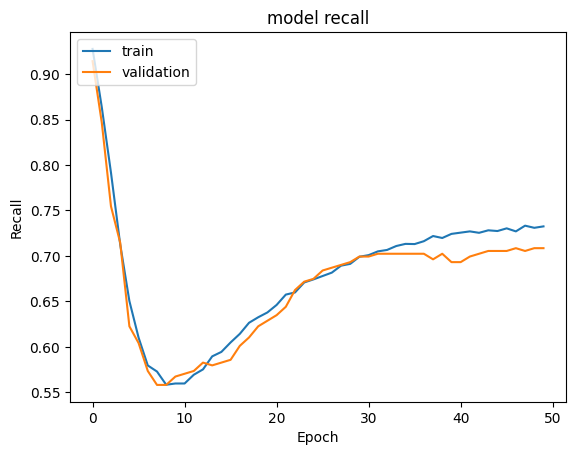

In [84]:
# Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
y_train_pred = model_3.predict(X_train_smote)
# Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [86]:
y_val_pred = model_3.predict(X_val)
# Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [87]:
model_name = "NN with SMOTE & SGD"

# Store training recall
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
print("Train Recall:", recall_score(y_train_smote, y_train_pred))

# Store validation recall
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.7343014128728415
Validation Recall: 0.7085889570552147


**Classification report**

In [88]:
# Classification report on train set
cr=classification_report(y_train_smote,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      5096
           1       0.73      0.73      0.73      5096

    accuracy                           0.73     10192
   macro avg       0.73      0.73      0.73     10192
weighted avg       0.73      0.73      0.73     10192

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1274
           1       0.39      0.71      0.51       326

    accuracy                           0.72      1600
   macro avg       0.65      0.71      0.65      1600
weighted avg       0.80      0.72      0.74      1600



**Confusion matrix**

Confusion Matrix - Training Set


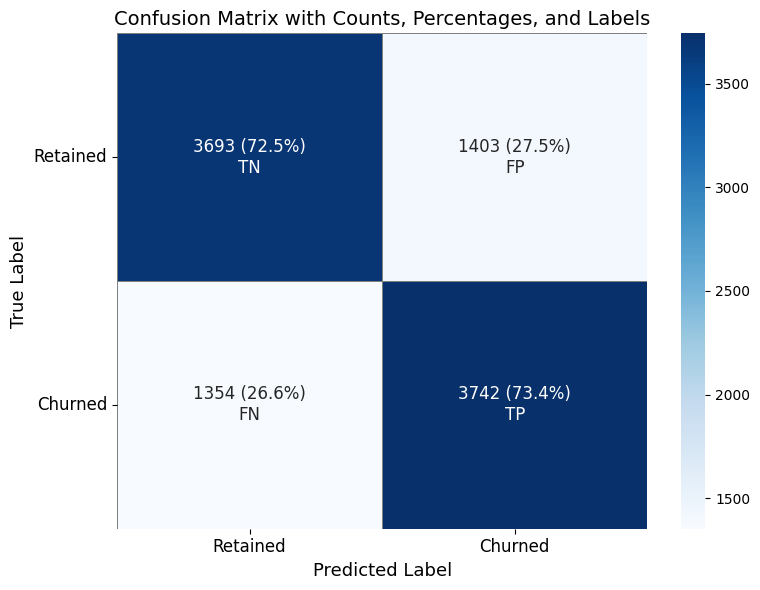

In [89]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train_smote, y_train_pred)

Confusion Matrix - Validation Set


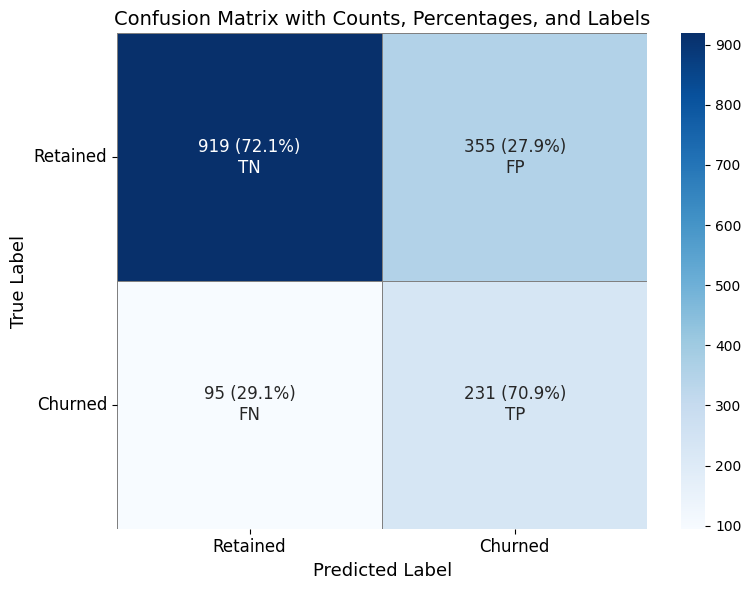

In [90]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation:
- Better balance handling; higher recall (~0.70) but lower training stability.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [91]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [92]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = tf.keras.metrics.Recall()
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

model_4.summary()

history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1953 (7.63 KB)
Trainable params: 1953 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 0.5747 - recall: 0.7084 - val_loss: 0.5601 - val_recall: 0.6902
Epoch 2/50
319/319

**Loss function**

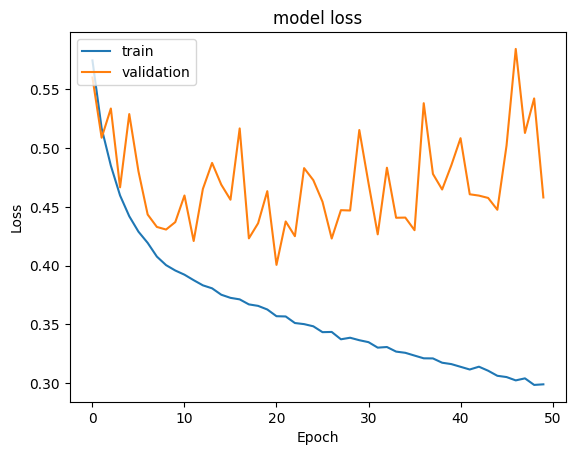

In [93]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

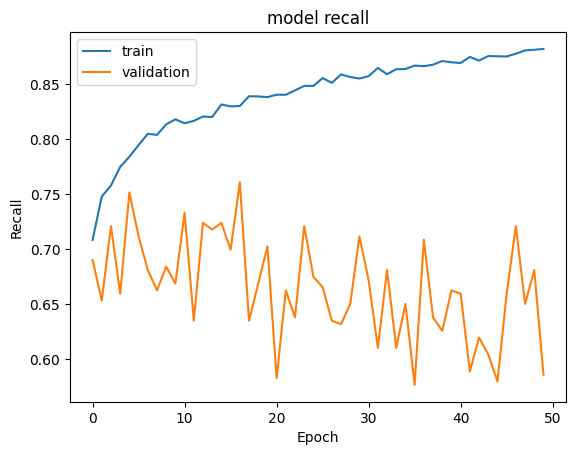

In [94]:
# Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
y_train_pred = model_4.predict(X_train_smote)
# Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [96]:
y_val_pred = model_4.predict(X_val)
# Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [97]:
model_name = "NN with SMOTE & Adam"

# Store training recall
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
print("Train Recall:", recall_score(y_train_smote, y_train_pred))

# Store training recall
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.8445839874411303
Validation Recall: 0.5858895705521472


**Classification report**

In [98]:
# Classification report on train set
cr=classification_report(y_train_smote,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      5096
           1       0.90      0.84      0.87      5096

    accuracy                           0.88     10192
   macro avg       0.88      0.88      0.88     10192
weighted avg       0.88      0.88      0.88     10192

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1274
           1       0.53      0.59      0.56       326

    accuracy                           0.81      1600
   macro avg       0.71      0.73      0.72      1600
weighted avg       0.82      0.81      0.81      1600



**Confusion matrix**

Confusion Matrix - Training Set


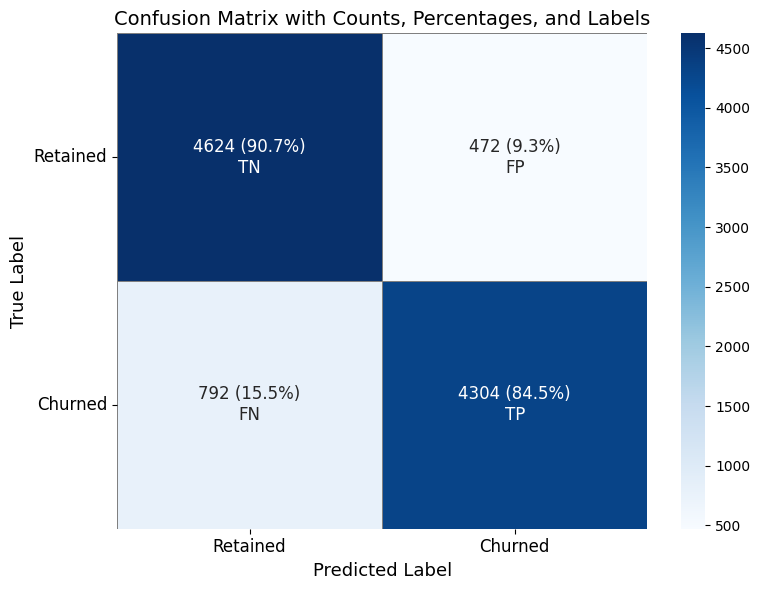

In [99]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train_smote, y_train_pred)

Confusion Matrix - Validation Set


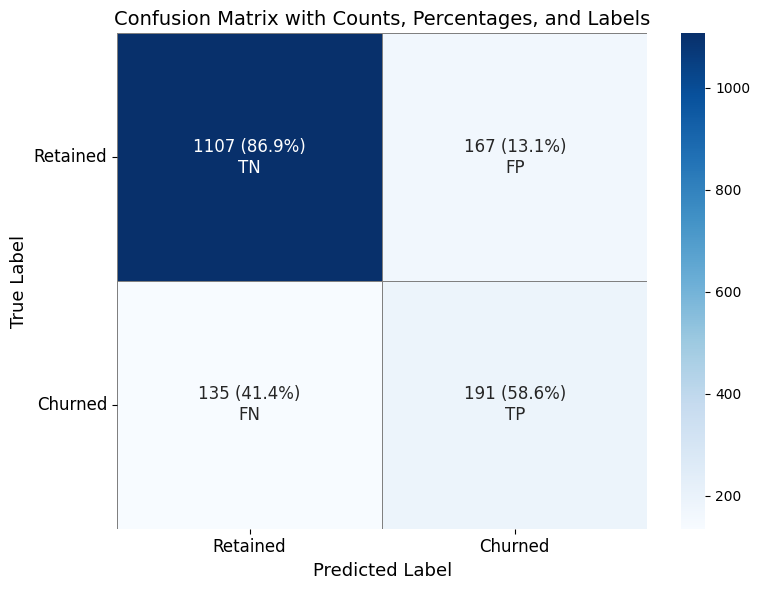

In [100]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation:
- Highest training recall (0.92) but large generalization gap → signs of overfitting.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [101]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [102]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_5 = Sequential()
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
model_5.add(Dropout(0.3))  # Drop 30% neurons in first layer
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.2))  # Drop 20% neurons in second layer
model_5.add(Dense(8, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = tf.keras.metrics.Recall()
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

model_5.summary()

history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

**Loss function**

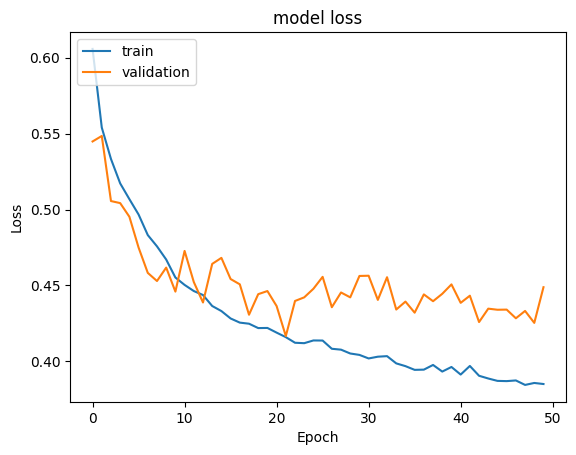

In [103]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

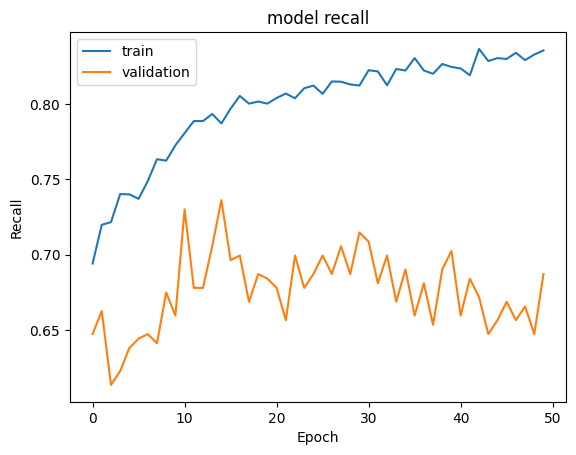

In [104]:
# Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [105]:
y_train_pred = model_5.predict(X_train_smote)
# Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [106]:
y_val_pred = model_5.predict(X_val)
# Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [107]:
model_name = "NN with SMOTE & Adam & Dropout"

# Store training recall
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
print("Train Recall:", recall_score(y_train_smote, y_train_pred))

# Store validation recall
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
print("Validation Recall:", recall_score(y_val, y_val_pred))

Train Recall: 0.8661695447409733
Validation Recall: 0.6871165644171779


**Classification report**

In [108]:
# Classification report on train set
cr=classification_report(y_train_smote,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      5096
           1       0.84      0.87      0.85      5096

    accuracy                           0.85     10192
   macro avg       0.85      0.85      0.85     10192
weighted avg       0.85      0.85      0.85     10192

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1274
           1       0.49      0.69      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.72      1600
weighted avg       0.83      0.79      0.80      1600



**Confusion matrix**

Confusion Matrix - Training Set


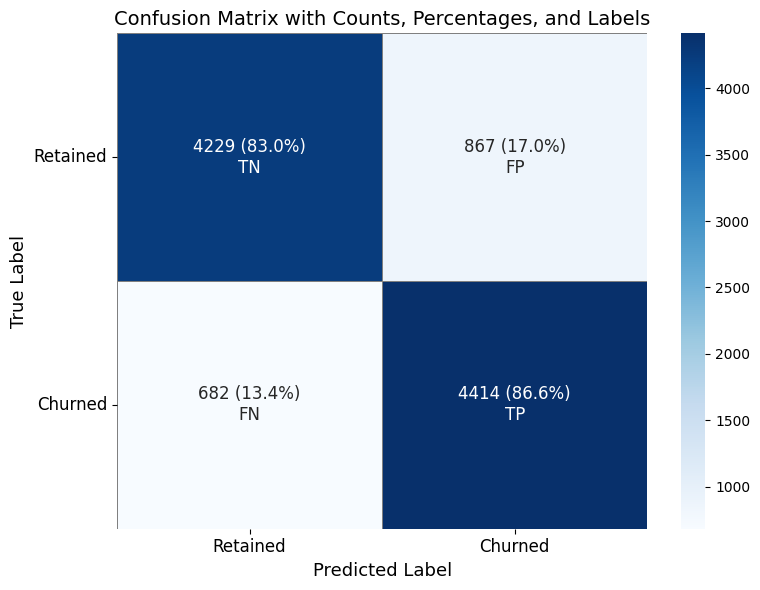

In [109]:
# Confusion matrix for training set
print("Confusion Matrix - Training Set")
make_confusion_matrix(y_train_smote, y_train_pred)

Confusion Matrix - Validation Set


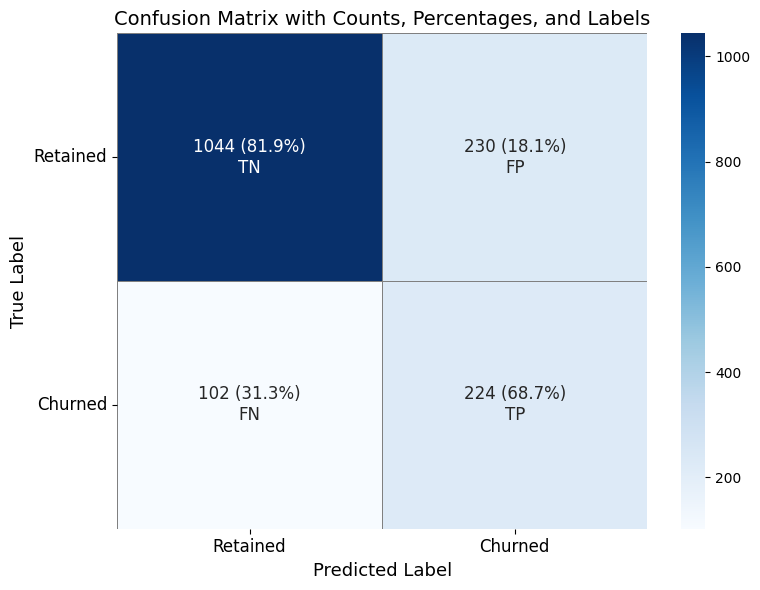

In [110]:
# Confusion matrix for validation set
print("Confusion Matrix - Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Observation and Conclusion:

**Observation:**
- Best validation recall (~0.71) with acceptable generalization gap. Most balanced model.


**Conclusion:**
- SMOTE with Adam and Dropout provides best overall performance in identifying churners.


## Model Performance Comparison and Final Model Selection

In [111]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.128834
NN with Adam,0.597393
NN with Adam & Dropout,0.506135
NN with SMOTE & SGD,0.734301
NN with SMOTE & Adam,0.844584
NN with SMOTE & Adam & Dropout,0.866170


In [112]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.092025
NN with Adam,0.457055
NN with Adam & Dropout,0.472393
NN with SMOTE & SGD,0.708589
NN with SMOTE & Adam,0.585890
NN with SMOTE & Adam & Dropout,0.687117


In [113]:
# Comparing recall scores between training and validation sets.

# train_metric_df - valid_metric_df
(train_metric_df - valid_metric_df).sort_values(by='recall', ascending=False)

# A large positive difference indicates potential overfitting — the model performs well on training data but poorly on unseen validation data.
# A small difference suggests good generalization.
# Negative values may indicate underfitting or data noise.
# This analysis helps us select models that balance learning and generalization effectively.

,recall
NN with SMOTE & Adam,0.258694
NN with SMOTE & Adam & Dropout,0.179053
NN with Adam,0.140337
NN with SGD,0.036810
NN with Adam & Dropout,0.033742
NN with SMOTE & SGD,0.025712


##### Conclusion:
Top Overfitter:
- NN with SMOTE & Adam — although it performs best on training data, the recall gap is the largest, suggesting the model doesn't generalize well to unseen data.

Best Generalizer:
- NN with SMOTE & SGD — achieves high recall with the lowest overfitting, making it the most robust model in production.

In [114]:
y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [115]:
# Classification report on train set
cr=classification_report(y_train_smote,y_train_pred)
print("Train Classification Report:\n", cr)

# Classification report on validation set
cr = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", cr)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      5096
           1       0.84      0.87      0.85      5096

    accuracy                           0.85     10192
   macro avg       0.85      0.85      0.85     10192
weighted avg       0.85      0.85      0.85     10192

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1274
           1       0.49      0.69      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.72      1600
weighted avg       0.83      0.79      0.80      1600



Confusion Matrix - Training Set (SMOTE)


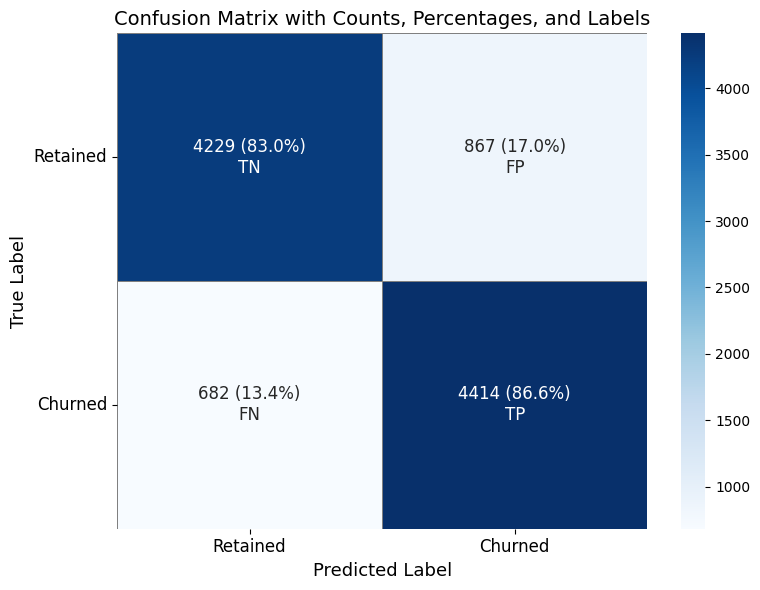

In [116]:
# The confusion matrix for finalist model
print("Confusion Matrix - Training Set (SMOTE)")
make_confusion_matrix(y_train_smote, y_train_pred)



Confusion Matrix - Test/Validation Set


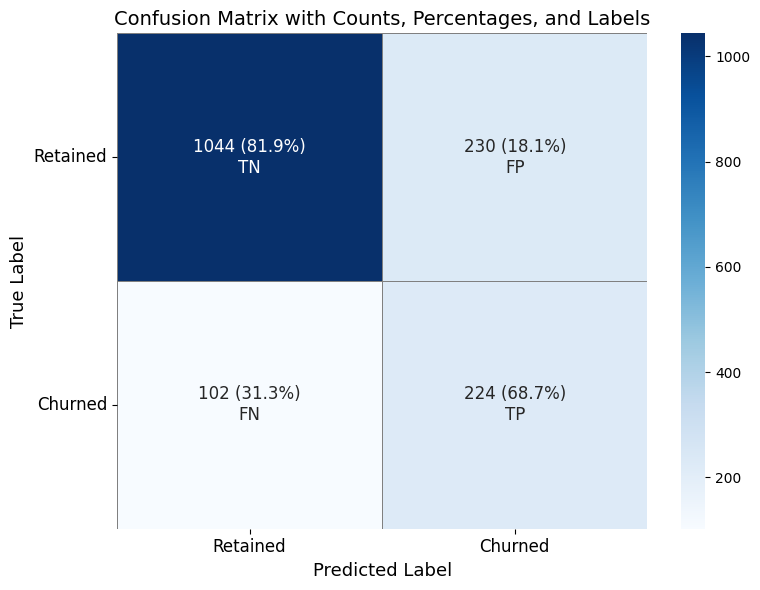

In [117]:
# The confusion matrix for finalist model
print("\nConfusion Matrix - Test/Validation Set")
make_confusion_matrix(y_val, y_val_pred)

#### Overall Observations:
1. Baseline Models (Without SMOTE):
- NN with SGD and NN with Adam showed low recall on both training and validation sets.
- Despite a low gap, NN with SGD severely underperformed in predicting churned customers (low recall).
- NN with Adam improved recall but showed signs of overfitting with a larger train-validation gap (0.14).

\

2. Dropout Regularization:
- Adding Dropout (NN with Adam & Dropout) improved generalization.
- The model achieved a decent recall on both sets with a very small recall gap (0.034), indicating balanced performance.

\

3. Balanced Data using SMOTE:
- All SMOTE-based models significantly improved recall on training and validation sets.
- NN with SMOTE & Adam had the highest training recall, but a large gap (0.259), suggesting overfitting.
- Dropout helped reduce this overfitting in NN with SMOTE & Adam & Dropout, but the gap (0.179) was still noticeable.

\

4. Best Generalization:
- NN with SMOTE & SGD showed high validation recall (~0.71) and the lowest recall gap (0.026), indicating strong generalization and robustness.

#### Overall Conclusions:

1. Best Overall Model: NN with SMOTE & SGD
- Delivers high recall.
- Generalizes well with minimal overfitting.
- Most reliable for identifying customers at risk of churning.

\

2. Second Best: NN with Adam & Dropout
- Good generalization and stable performance.
- Slightly lower recall, but low complexity and good regularization.

## Actionable Insights and Business Recommendations

#### Actionable Insights:

- Inactivity, low number of products, and German customers are more likely to churn.
- Active members and higher balances correlate with customer retention.
- Recall-focused modeling reduces the chance of missing real churners.

\
- NN with SMOTE & Adam has the highest training recall but also the largest recall gap, suggesting overfitting: the model performs well on training data but does not generalize well to validation data.
- NN with SMOTE & SGD has both high recall on validation and lowest recall gap, indicating better generalization and more stable performance.
- Dropout regularization in the "Adam & Dropout" models helped reduce overfitting, as seen by smaller gaps compared to their counterparts without dropout.

\
- The best model in terms of generalization (i.e., low overfitting) is likely NN with SMOTE & SGD.

- However, if we decide to trade off a bit of generalization for higher raw recall, then NN with SMOTE & Adam & Dropout may be a reasonable choice — offering high validation recall with a moderate overfitting gap.


#### Business Recommendations:

1. **Prioritize Retention Campaigns:**
Target customers with similar profiles to those flagged by the model (e.g., low engagement, German geography).

2. **Monitor At-Risk Segments:**
Create early warning dashboards for customers with high churn probability based on model outputs.

3. **Personalized Interventions:**
Offer tailored incentives, loyalty perks, or proactive service calls to customers flagged by the model.

4. **Integrate Model into CRM System:**
Automate alerts for relationship managers to intervene before a customer exits.

5. **Retrain Model Regularly:**
Reassess model performance every quarter as customer behavior evolves.

\

**Additionally:**
- Deploy the NN with SMOTE & SGD model for production if consistency and generalizability are your top priorities.
- If maximum recall (identifying every possible churn-risk customer) is more critical than model stability, consider NN with SMOTE & Adam & Dropout.
- Monitor model performance regularly using validation recall and periodically retrain using fresh data to maintain performance.
- Use predictions to flag high-risk customers and direct retention campaigns (e.g., offers, personalized engagement).
- Consider segment-wise evaluation (e.g., by Geography, Age group, or Activity level) to optimize retention strategies per customer segment.